In [6]:
import pandas as pd
titanic = pd.read_csv("data/titanic.csv")
titanic["age"]= titanic["age"].replace(["?"], [None]).astype('float')
titanic["age"]= titanic["fare"].replace(["?"], [None]).astype('float')

carstocks = pd.read_csv("data/car_stocks.csv")


In [10]:
s1 = titanic.groupby("sex")["age"].mean()
s1.index

Index(['female', 'male'], dtype='object', name='sex')

In [13]:
df = titanic.groupby(["pclass", "sex"]).mean()
df.index

C:\Users\ankit\AppData\Local\Temp\ipykernel_1832\853256523.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = titanic.groupby(["pclass", "sex"]).mean()


MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [15]:
af = titanic.groupby(["sex","age"]).mean()

C:\Users\ankit\AppData\Local\Temp\ipykernel_1832\2696859069.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  af = titanic.groupby(["sex","age"]).mean()


In [17]:
pops = pd.read_csv("data/state_pops.csv")
pops.set_index("state")

,year,population
state,,
AL,2012,4817528.0
AL,2010,4785570.0
AL,2011,4801627.0
AL,2009,4757938.0
AL,2013,4833722.0
...,...,...
USA,2013,316128839.0
USA,2009,306771529.0
USA,2010,309326295.0


In [23]:
pops.set_index(["state","year"],inplace= True)

In [24]:
pops.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [26]:
pops.sort_index(ascending=[True, True],level=[0,1])

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [27]:
pops.loc[("TX", 2000)]

population    20944499.0
Name: (TX, 2000), dtype: float64

In [28]:
pops.xs(2013,level=1)

,population
state,
AL,4833722.0
AK,735132.0
AZ,6626624.0
AR,2959373.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DE,925749.0
DC,646449.0


In [32]:
pops.index.get_level_values(1)[55]

2005

In [37]:
even_years = pops.index.get_level_values(1) % 2 == 0
len(even_years)

1272

In [38]:
pops[even_years]

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2008    4718206.0
      2006    4628981.0
      2004    4530729.0
...                 ...
USA   2004  292805298.0
      2006  298379912.0
      2008  304093966.0
      2010  309326295.0
      2012  313873685.0

[636 rows x 1 columns]

In [41]:
even_pop = pops["population"]%2 ==0

In [42]:
pops[even_years & even_pop]

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2008    4718206.0
      1992    4154014.0
AK    1990     553290.0
...                 ...
USA   1994  263125826.0
      1998  275854116.0
      2004  292805298.0
      2006  298379912.0
      2008  304093966.0

[304 rows x 1 columns]

In [43]:
pops.unstack()

population                                         ...                                                    
year          1990         1991         1992         1993  ...         2010         2011         2012         2013
state                                                      ...                                                    
AK        553290.0     570193.0     588736.0     599434.0  ...     713868.0     723375.0     730307.0     735132.0
AL       4050055.0    4099156.0    4154014.0    4214202.0  ...    4785570.0    4801627.0    4817528.0    4833722.0
AR       2356586.0    2383144.0    2415984.0    2456303.0  ...    2922280.0    2938506.0    2949828.0    2959373.0
AZ       3684097.0    3788576.0    3915740.0    4065440.0  ...    6408790.0    6468796.0    6551149.0    6626624.0
CA      29959515.0   30470736.0   30974659.0   31274928.0  ...   37333601.0   37668681.0   37999878.0   38332521.0
CO       3307618.0    3387119.0    3495939.0    3613734.0  ...    5048196.0    5118400.0    5189458.0    5268367.0
CT       3291967.0    3302895.0    3300712.0    3309175.0  ...    3579210.0    3588948.0    3591765.0    3596080.0
DC        605321.0     600870.0     597567.0     595302.0  ...     605125.0     619624.0     633427.0     646449.0
DE        669567.0     683080.0     694927.0     706378.0  ...     899711.0     907985.0     917053.0     925749.0
FL      13033307.0   13369798.0   13650553.0   13927185.0  ...   18846054.0   19083482.0   19320749.0   19552860.0
GA       6512602.0    6653005.0    6817203.0    6978240.0  ...    9713248.0    9810181.0    9915646.0    9992167.0
HI       1113491.0    1136754.0    1158613.0    1172838.0  ...    1363731.0    1376897.0    1390090.0    1404054.0
IA       2781018.0    2797613.0    2818401.0    2836972.0  ...    3050314.0    3064102.0    3075039.0    3090416.0
ID       1012384.0    1041316.0    1071685.0    1108768.0  ...    1570718.0    1583930.0    1595590.0    1612136.0
IL      11453316.0   11568964.0   11694184.0   11809579.0  ...   12839695.0   12855970.0   12868192.0   12882135.0
IN       5557798.0    5616388.0    5674547.0    5739019.0  ...    6489965.0    6516336.0    6537782.0    6570902.0
KS       2481349.0    2498722.0    2532395.0    2556547.0  ...    2858910.0    2869548.0    2885398.0    2893957.0
KY       3694048.0    3722328.0    3765469.0    3812206.0  ...    4347698.0    4366869.0    4379730.0    4395295.0
LA       4221532.0    4253279.0    4293003.0    4316428.0  ...    4545392.0    4575197.0    4602134.0    4625470.0
MA       6022639.0    6018470.0    6028709.0    6060569.0  ...    6563263.0    6606285.0    6645303.0    6692824.0
MD       4799770.0    4867641.0    4923369.0    4971889.0  ...    5787193.0    5840241.0    5884868.0    5928814.0
ME       1231719.0    1237081.0    1238508.0    1242302.0  ...    1327366.0    1327844.0    1328501.0    1328302.0
MI       9311319.0    9400446.0    9479065.0    9540114.0  ...    9876149.0    9874589.0    9882519.0    9895622.0
MN       4389857.0    4440859.0    4495572.0    4555956.0  ...    5310337.0    5347108.0    5379646.0    5420380.0
MO       5128880.0    5170800.0    5217101.0    5271175.0  ...    5996063.0    6010065.0    6024522.0    6044171.0
MS       2578897.0    2598733.0    2623734.0    2655100.0  ...    2970047.0    2977886.0    2986450.0    2991207.0
MT        800204.0     809680.0     825770.0     844761.0  ...     990527.0     997600.0    1005494.0    1015165.0
NC       6664016.0    6784280.0    6897214.0    7042818.0  ...    9559533.0    9651377.0    9748364.0    9848060.0
ND        637685.0     635753.0     638223.0     641216.0  ...     674344.0     684867.0     701345.0     723393.0
NE       1581660.0    1595919.0    1611687.0    1625590.0  ...    1829838.0    1841749.0    1855350.0    1868516.0
NH       1112384.0    1109929.0    1117785.0    1129458.0  ...    1316614.0    1318075.0    1321617.0    1323459.0
NJ       7762963.0    7814676.0    7880508.0    7948915.0  ...    8802707.0    8836639.0    886774

In [50]:
pops.unstack("state")

population                                               ...                                                     
state         AK         AL         AR         AZ          CA  ...        VT         WA         WI         WV        WY
year                                                           ...                                                     
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  ...  564798.0  4903043.0  4904562.0  1792548.0  453690.0
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  ...  568606.0  5025624.0  4964343.0  1798735.0  459260.0
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  ...  572751.0  5160757.0  5025398.0  1806451.0  466251.0
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  ...  577748.0  5278842.0  5084889.0  1817539.0  473081.0
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  ...  583836.0  5375161.0  5133678.0  1820421.0  480283.0
1995    604412.0  4296800.0  2535399.0  4432499.0  31696582.0  ...  589003.0  5481027.0  5184836.0  1823700.0  485160.0
1996    608569.0  4331103.0  2572109.0  4586940.0  32018834.0  ...  593701.0  5569753.0  5229986.0  1822808.0  488167.0
1997    612968.0  4367935.0  2601091.0  4736990.0  32486010.0  ...  597239.0  5674747.0  5266213.0  1819113.0  489452.0
1998    619933.0  4404701.0  2626289.0  4883342.0  32987675.0  ...  600416.0  5769562.0  5297673.0  1815609.0  490787.0
1999    624779.0  4430141.0  2651860.0  5023823.0  33499204.0  ...  604683.0  5842564.0  5332666.0  1811799.0  491780.0
2000    627963.0  4452173.0  2678588.0  5160586.0  33987977.0  ...  609618.0  5910512.0  5373999.0  1807021.0  494300.0
2001    633714.0  4467634.0  2691571.0  5273477.0  34479458.0  ...  612223.0  5985722.0  5406835.0  1801481.0  494657.0
2002    642337.0  4480089.0  2705927.0  5396255.0  34871843.0  ...  615442.0  6052349.0  5445162.0  1805414.0  500017.0
2003    648414.0  4503491.0  2724816.0  5510364.0  35253159.0  ...  617858.0  6104115.0  5479203.0  1812295.0  503453.0
2004    659286.0  4530729.0  2749686.0  5652404.0  35574576.0  ...  619920.0  6178645.0  5514026.0  1816438.0  509106.0
2005    666946.0  4569805.0  2781097.0  5839077.0  35827943.0  ...  621215.0  6257305.0  5546166.0  1820492.0  514157.0
2006    675302.0  4628981.0  2821761.0  6029141.0  36021202.0  ...  622892.0  6370753.0  5577655.0  1827912.0  522667.0
2007    680300.0  4672840.0  2848650.0  6167681.0  36250311.0  ...  623481.0  6461587.0  5610775.0  1834052.0  534876.0
2008    687455.0  4718206.0  2874554.0  6280362.0  36604337.0  ...  624151.0  6562231.0  5640996.0  1840310.0  546043.0
2009    698895.0  4757938.0  2896843.0  6343154.0  36961229.0  ...  624817.0  6667426.0  5669264.0  1847775.0  559851.0
2010    713868.0  4785570.0  2922280.0  6408790.0  37333601.0  ...  625793.0  6742256.0  5689060.0  1854146.0  564222.0
2011    723375.0  4801627.0  2938506.0  6468796.0  37668681.0  ...  626320.0  6821481.0  5708785.0  1855184.0  567329.0
2012    730307.0  4817528.0  2949828.0  6551149.0  37999878.0  ...  625953.0  6895318.0  5724554.0  1856680.0  576626.0
2013    735132.0  4833722.0  2959373.0  6626624.0  38332521.0  ...  626630.0  6971406.0  5742713.0  1854304.0  582658.0

[24 rows x 53 columns]

In [48]:
a.stack().unstack()

population                                               ...                                                     
state         AK         AL         AR         AZ          CA  ...        VT         WA         WI         WV        WY
year                                                           ...                                                     
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  ...  564798.0  4903043.0  4904562.0  1792548.0  453690.0
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  ...  568606.0  5025624.0  4964343.0  1798735.0  459260.0
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  ...  572751.0  5160757.0  5025398.0  1806451.0  466251.0
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  ...  577748.0  5278842.0  5084889.0  1817539.0  473081.0
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  ...  583836.0  5375161.0  5133678.0  1820421.0  480283.0
1995    604412.0  4296800.0  2535399.0  4432499.0  31696582.0  ...  589003.0  5481027.0  5184836.0  1823700.0  485160.0
1996    608569.0  4331103.0  2572109.0  4586940.0  32018834.0  ...  593701.0  5569753.0  5229986.0  1822808.0  488167.0
1997    612968.0  4367935.0  2601091.0  4736990.0  32486010.0  ...  597239.0  5674747.0  5266213.0  1819113.0  489452.0
1998    619933.0  4404701.0  2626289.0  4883342.0  32987675.0  ...  600416.0  5769562.0  5297673.0  1815609.0  490787.0
1999    624779.0  4430141.0  2651860.0  5023823.0  33499204.0  ...  604683.0  5842564.0  5332666.0  1811799.0  491780.0
2000    627963.0  4452173.0  2678588.0  5160586.0  33987977.0  ...  609618.0  5910512.0  5373999.0  1807021.0  494300.0
2001    633714.0  4467634.0  2691571.0  5273477.0  34479458.0  ...  612223.0  5985722.0  5406835.0  1801481.0  494657.0
2002    642337.0  4480089.0  2705927.0  5396255.0  34871843.0  ...  615442.0  6052349.0  5445162.0  1805414.0  500017.0
2003    648414.0  4503491.0  2724816.0  5510364.0  35253159.0  ...  617858.0  6104115.0  5479203.0  1812295.0  503453.0
2004    659286.0  4530729.0  2749686.0  5652404.0  35574576.0  ...  619920.0  6178645.0  5514026.0  1816438.0  509106.0
2005    666946.0  4569805.0  2781097.0  5839077.0  35827943.0  ...  621215.0  6257305.0  5546166.0  1820492.0  514157.0
2006    675302.0  4628981.0  2821761.0  6029141.0  36021202.0  ...  622892.0  6370753.0  5577655.0  1827912.0  522667.0
2007    680300.0  4672840.0  2848650.0  6167681.0  36250311.0  ...  623481.0  6461587.0  5610775.0  1834052.0  534876.0
2008    687455.0  4718206.0  2874554.0  6280362.0  36604337.0  ...  624151.0  6562231.0  5640996.0  1840310.0  546043.0
2009    698895.0  4757938.0  2896843.0  6343154.0  36961229.0  ...  624817.0  6667426.0  5669264.0  1847775.0  559851.0
2010    713868.0  4785570.0  2922280.0  6408790.0  37333601.0  ...  625793.0  6742256.0  5689060.0  1854146.0  564222.0
2011    723375.0  4801627.0  2938506.0  6468796.0  37668681.0  ...  626320.0  6821481.0  5708785.0  1855184.0  567329.0
2012    730307.0  4817528.0  2949828.0  6551149.0  37999878.0  ...  625953.0  6895318.0  5724554.0  1856680.0  576626.0
2013    735132.0  4833722.0  2959373.0  6626624.0  38332521.0  ...  626630.0  6971406.0  5742713.0  1854304.0  582658.0

[24 rows x 53 columns]

<Axes: xlabel='pclass'>

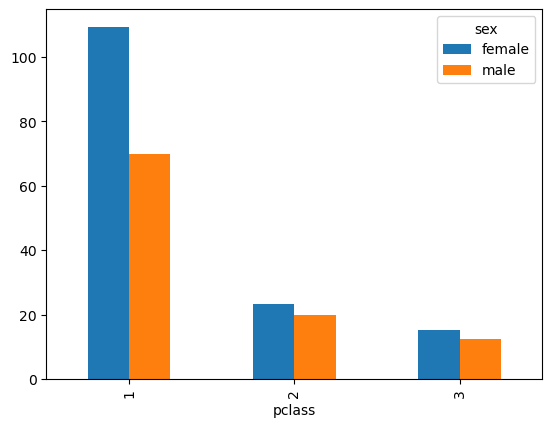

In [52]:
titanic.groupby(["pclass","sex"])["age"].mean().unstack().plot(kind = "bar")